


*   Luis Rodolfo Bojorquez Pineda
*   A01250513





#Instalamos Spark

In [ ]:
#Bibliotecas para poder trabajar con Spark
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.5.0//spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [555 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,009 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,398 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,131 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,330 kB]
Ge

In [ ]:
#Configuración de Spark con Python
!pip install -q findspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=0b59b6c812e7c9d32c7117fe6d5eabacc6df987978adb655a9b0b01e86ddb595
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
#Estableciendo variable de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

#Buscando e inicializando la instalación de Spark
import findspark
findspark.init()
findspark.find()

#Probando PySparl
from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark = SparkSession \
       .builder \
       .appName("Hola mundo Spark") \
       .getOrCreate()

spark

# Regresion Linear

In [ ]:
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression

In [ ]:
# Load training data
training = spark.read.format("libsvm")\
    .load("spark-3.5.0-bin-hadoop3/data/mllib/sample_linear_regression_data.txt")

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [ ]:
# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

Coefficients: [0.0,0.3229251667740594,-0.3438548034562219,1.915601702345841,0.05288058680386255,0.765962720459771,0.0,-0.15105392669186676,-0.21587930360904645,0.2202536918881343]
Intercept: 0.15989368442397356


In [ ]:

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

numIterations: 6
objectiveHistory: [0.49999999999999994, 0.4967620357443381, 0.49363616643404634, 0.4936351537897608, 0.4936351214177871, 0.49363512062528014, 0.4936351206216114]
+--------------------+
|           residuals|
+--------------------+
|  -9.889232683103197|
|  0.5533794340053553|
|  -5.204019455758822|
| -20.566686715507508|
|    -9.4497405180564|
|  -6.909112502719487|
|  -10.00431602969873|
|  2.0623978070504845|
|  3.1117508432954772|
|  -15.89360822941938|
|  -5.036284254673026|
|  6.4832158769943335|
|  12.429497299109002|
|  -20.32003219007654|
|    -2.0049838218725|
| -17.867901734183793|
|   7.646455887420495|
| -2.2653482182417406|
|-0.10308920436195645|
|  -1.380034070385301|
+--------------------+
only showing top 20 rows

RMSE: 10.189077
r2: 0.022861


R²: 0.022861466913958406


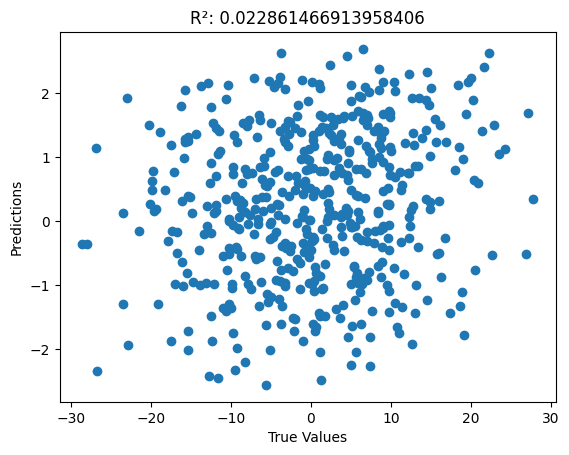

In [ ]:
# Make predictions on the training data
predictions = lrModel.transform(training)

# Calculate R²
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R²:", r2)

# Plot R²
plt.figure()
plt.scatter(predictions.select("label").collect(), predictions.select("prediction").collect())
plt.title(f"R²: {r2}")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

# Clasificacion: Regresion Logistica

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
# Load training data
training = spark.read.format("libsvm").load("/content/spark-3.5.0-bin-hadoop3/data/mllib/sample_libsvm_data.txt")

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [ ]:
# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

Coefficients: (692,[272,300,323,350,351,378,379,405,406,407,428,433,434,435,455,456,461,462,483,484,489,490,496,511,512,517,539,540,568],[-7.520689871384186e-05,-8.115773146847071e-05,3.814692771846355e-05,0.00037764905404243413,0.00034051483661944043,0.0005514455157343107,0.0004085386116096918,0.000419746733274946,0.0008119171358670032,0.0005027708372668753,-2.392926040660163e-05,0.0005745048020902295,0.0009037546426803719,7.818229700243984e-05,-2.1787551952912656e-05,-3.4021658217896046e-05,0.0004966517360637638,0.0008190557828370373,-8.017982139522677e-05,-2.743169403783598e-05,0.00048108322262389907,0.00048408017626778754,-8.92647292001121e-06,-0.0003414881233042733,-8.950592574121474e-05,0.00048645469116892124,-8.478698005186183e-05,-0.00042347832158317684,-7.296535777631314e-05])
Intercept: -0.599146028640144


In [ ]:
# We can also use the multinomial family for binary classification
mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")

# Fit the model
mlrModel = mlr.fit(training)

# Print the coefficients and intercepts for logistic regression with multinomial family
print("Multinomial coefficients: " + str(mlrModel.coefficientMatrix))
print("Multinomial intercepts: " + str(mlrModel.interceptVector))

Multinomial coefficients: 2 X 692 CSRMatrix
(0,272) 0.0001
(0,300) 0.0001
(0,350) -0.0002
(0,351) -0.0001
(0,378) -0.0003
(0,379) -0.0002
(0,405) -0.0002
(0,406) -0.0004
(0,407) -0.0002
(0,433) -0.0003
(0,434) -0.0005
(0,435) -0.0001
(0,456) 0.0
(0,461) -0.0002
(0,462) -0.0004
(0,483) 0.0001
..
..
Multinomial intercepts: [0.2750587585718083,-0.2750587585718083]


In [ ]:
# Make predictions on the training data
predictions = lrModel.transform(training)

# Create a MulticlassClassificationEvaluator to compute accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
confusion_matrix = predictions.groupBy("label", "prediction").count()
confusion_matrix.show()

# Alternatively, you can create a Pandas DataFrame for better visualization
confusion_matrix_pd = confusion_matrix.toPandas()
print("Confusion Matrix:")
print(confusion_matrix_pd)

Accuracy: 0.99
+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|   56|
|  1.0|       0.0|    1|
|  0.0|       0.0|   43|
+-----+----------+-----+

Confusion Matrix:
   label  prediction  count
0    1.0         1.0     56
1    1.0         0.0      1
2    0.0         0.0     43


# Agrupacion: K-Means

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
# Loads data.
dataset = spark.read.format("libsvm").load("/content/spark-3.5.0-bin-hadoop3/data/mllib/sample_kmeans_data.txt")

# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.9997530305375207


In [ ]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[9.1 9.1 9.1]
[0.1 0.1 0.1]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the cluster assignments from the predictions
cluster_assignments = predictions.select("prediction").rdd.map(lambda row: row[0]).collect()

# Convert the features to a NumPy array for visualization
features = np.array(predictions.select("features").rdd.map(lambda row: row[0]).collect())

# Separate the points by cluster
clusters = [[] for _ in range(model.getK())]
for i, cluster_id in enumerate(cluster_assignments):
    clusters[cluster_id].append(features[i])

# Convert the clusters to NumPy arrays for plotting
cluster_arrays = [np.array(cluster) for cluster in clusters]

# Plot the clusters
for i, cluster in enumerate(cluster_arrays):
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}')

# Plot cluster centers
centers = np.array(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='k', marker='x', s=200, label='Cluster Centers')

plt.title("K-Means Clustering")
plt.legend()
plt.show()

TypeError: ignored